In [1]:
# %pip install matplotlib
# %pip install scikit-learn

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.metrics.pairwise import cosine_similarity

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import squareform

import os

In [7]:
## IMPORT MY CUSTOM FUNCTIONS
from data_cleaning_functions.goal_features import get_goal_labels
from data_cleaning_functions.clean_self_report import get_evening_affect_run1
from data_cleaning_functions.clean_self_report import get_evening_affect_run2

In [8]:
working_dir = "/Users/farhan/Desktop/Courses/goal_research/"
label_cols = ['ParticipantIdentifier', 'DAILY_goal1_label', 'DAILY_goal2_label', 'trial_date']

In [11]:
run1_goal_labels = get_goal_labels(working_dir, "data/run1_goal_label_plus_embedding.csv")
run2_goal_labels = get_goal_labels(working_dir, "data/run2_goal_label_plus_embedding.csv")

self_report_df = pd.read_csv()

In [15]:
# pd.concat([run1_self_report, run2_self_report]).to_csv("self_report_measures.csv")

In [12]:
run1_goal_self_reports = run1_self_report.merge(run1_goal_labels[label_cols], 
                                       on=['ParticipantIdentifier', 'trial_date']
                                       )

run2_goal_self_reports = run2_self_report.merge(run2_goal_labels[label_cols], 
                                       on=['ParticipantIdentifier', 'trial_date']
                                       )

goal_self_reports = pd.concat([run1_goal_self_reports, run2_goal_self_reports])


In [7]:

goal_self_reports.head(3)

,ParticipantIdentifier,trial_date,DAILY_goal1_confidence,DAILY_goal1_consequences,DAILY_goal1_effort,DAILY_goal1_importance,DAILY_goal2_confidence,DAILY_goal2_consequences,DAILY_goal2_effort,DAILY_goal2_importance,DAILY_goal1_set,DAILY_goal2_set,DAILY_goal1_report,DAILY_goal2_report,DAILY_goal2_interaction_eachOther,DAILY_goal1_label,DAILY_goal2_label
0,0501ba67-3406-4779-aff1-878a0e9f7885,2022-09-30,4,3,6,5,6,1,7,4,"Study history and psychology, practice the vio...",Do exercise,NaN,NaN,NaN,Work_School,Exercise
1,0501ba67-3406-4779-aff1-878a0e9f7885,2022-10-01,5,4,7,7,3,3,5,5,study history lectures,Watch the historical movie,70,100,NaN,!!!FIX_ME!!!,!!!FIX_ME!!!
2,0501ba67-3406-4779-aff1-878a0e9f7885,2022-10-02,7,5,4,7,2,7,7,7,Watch a historical movie,Review for psy and bio,89,0,NaN,Reading_leisure,Work_School


In [8]:
measures = [ 'confidence', 'consequences', 'importance', 'effort', 'motivationExternal', 'motivationInternal', 'report']

categories = [
   'Exercise', 'MentalPersonal_Health', 'Medical_Health', 'Sleep', 'Alcohol_drug', 'Online', 'Phone', 'Video games', 'Reading_leisure', 'SocialMedia',
   'Sports_playing', 'TV_Streaming', 'Family', 'Friends', 'Partner', 'Social_life', 'Hobby', 'Housework', 'Cooking', 'Work_School', 'Environment', 
   'Culture', 'Learning', 'Self-Improvement', 'Volunteering', 'Community involvement', 'Admin', 'Future_Planning', 'Finances', 'Time_Management', 
   'Punctuality', 'Personal_Values', 'Other', 'Diet'
]

In [9]:
goal_self_reports = goal_self_reports[goal_self_reports['DAILY_goal1_label'] != '!!!FIX_ME!!!']
goal_self_reports = goal_self_reports[goal_self_reports['DAILY_goal2_label'] != '!!!FIX_ME!!!']
goal_self_reports = goal_self_reports[goal_self_reports['DAILY_goal1_label'].isin(categories)]
goal_self_reports = goal_self_reports[goal_self_reports['DAILY_goal2_label'].isin(categories)]
goal_self_reports = goal_self_reports.dropna()
goal_self_reports = goal_self_reports.reset_index()
goal_self_reports.head()

In [10]:
resultList = []
for category1 in categories:
    for category2 in categories:
        entry = {}
        entry['goal1'] = category1
        entry['goal2'] = category2
        tempDF = goal_self_reports.loc[(goal_self_reports['DAILY_goal1_label'] == category1) & (goal_self_reports['DAILY_goal2_label'] == category2)]
        if len(tempDF) < 5:
            entry['dist'] = np.nan
        else:
            corr = tempDF['DAILY_goal1_report'].corr(tempDF['DAILY_goal2_report'])
            entry['dist'] = (1 - corr) / 2
        resultList.append(entry)
print(resultList)

[{'goal1': 'Exercise', 'goal2': 'Exercise', 'dist': 0.025586800007444843}, {'goal1': 'Exercise', 'goal2': 'MentalPersonal_Health', 'dist': 0.18302291260398373}, {'goal1': 'Exercise', 'goal2': 'Medical_Health', 'dist': nan}, {'goal1': 'Exercise', 'goal2': 'Sleep', 'dist': 0.43187937222883743}, {'goal1': 'Exercise', 'goal2': 'Alcohol_drug', 'dist': nan}, {'goal1': 'Exercise', 'goal2': 'Online', 'dist': nan}, {'goal1': 'Exercise', 'goal2': 'Phone', 'dist': nan}, {'goal1': 'Exercise', 'goal2': 'Video games', 'dist': nan}, {'goal1': 'Exercise', 'goal2': 'Reading_leisure', 'dist': 0.2809907715086581}, {'goal1': 'Exercise', 'goal2': 'SocialMedia', 'dist': nan}, {'goal1': 'Exercise', 'goal2': 'Sports_playing', 'dist': nan}, {'goal1': 'Exercise', 'goal2': 'TV_Streaming', 'dist': nan}, {'goal1': 'Exercise', 'goal2': 'Family', 'dist': nan}, {'goal1': 'Exercise', 'goal2': 'Friends', 'dist': nan}, {'goal1': 'Exercise', 'goal2': 'Partner', 'dist': nan}, {'goal1': 'Exercise', 'goal2': 'Social_life', 

/Users/farhan/miniforge3/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/farhan/miniforge3/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [11]:
unique_goals = sorted(set([entry['goal1'] for entry in resultList] + [entry['goal2'] for entry in resultList]))
distance_matrix = pd.DataFrame(np.zeros((len(unique_goals), len(unique_goals))), index=unique_goals, columns=unique_goals)

# Fill the distance matrix with distances from resultList
for entry in resultList:
    distance_matrix.loc[entry['goal1'], entry['goal2']] = entry['dist']
    distance_matrix.loc[entry['goal2'], entry['goal1']] = entry['dist']  # Ensure the matrix is symmetric

max_finite_value = np.nanmax(np.where(np.isfinite(distance_matrix), distance_matrix, np.nan))
distance_matrix.replace([np.inf, -np.inf], max_finite_value, inplace=True)
distance_matrix.fillna(max_finite_value, inplace=True)

distance_array = distance_matrix.values

In [12]:
# Perform hierarchical clustering
# Distance Matrix: If your input is a condensed distance matrix 
#   (a 1D array containing the upper or lower triangular part of the distance matrix), 
#   the linkage function will directly use these precomputed distances to merge clusters.
linked = linkage(distance_array, method='average')

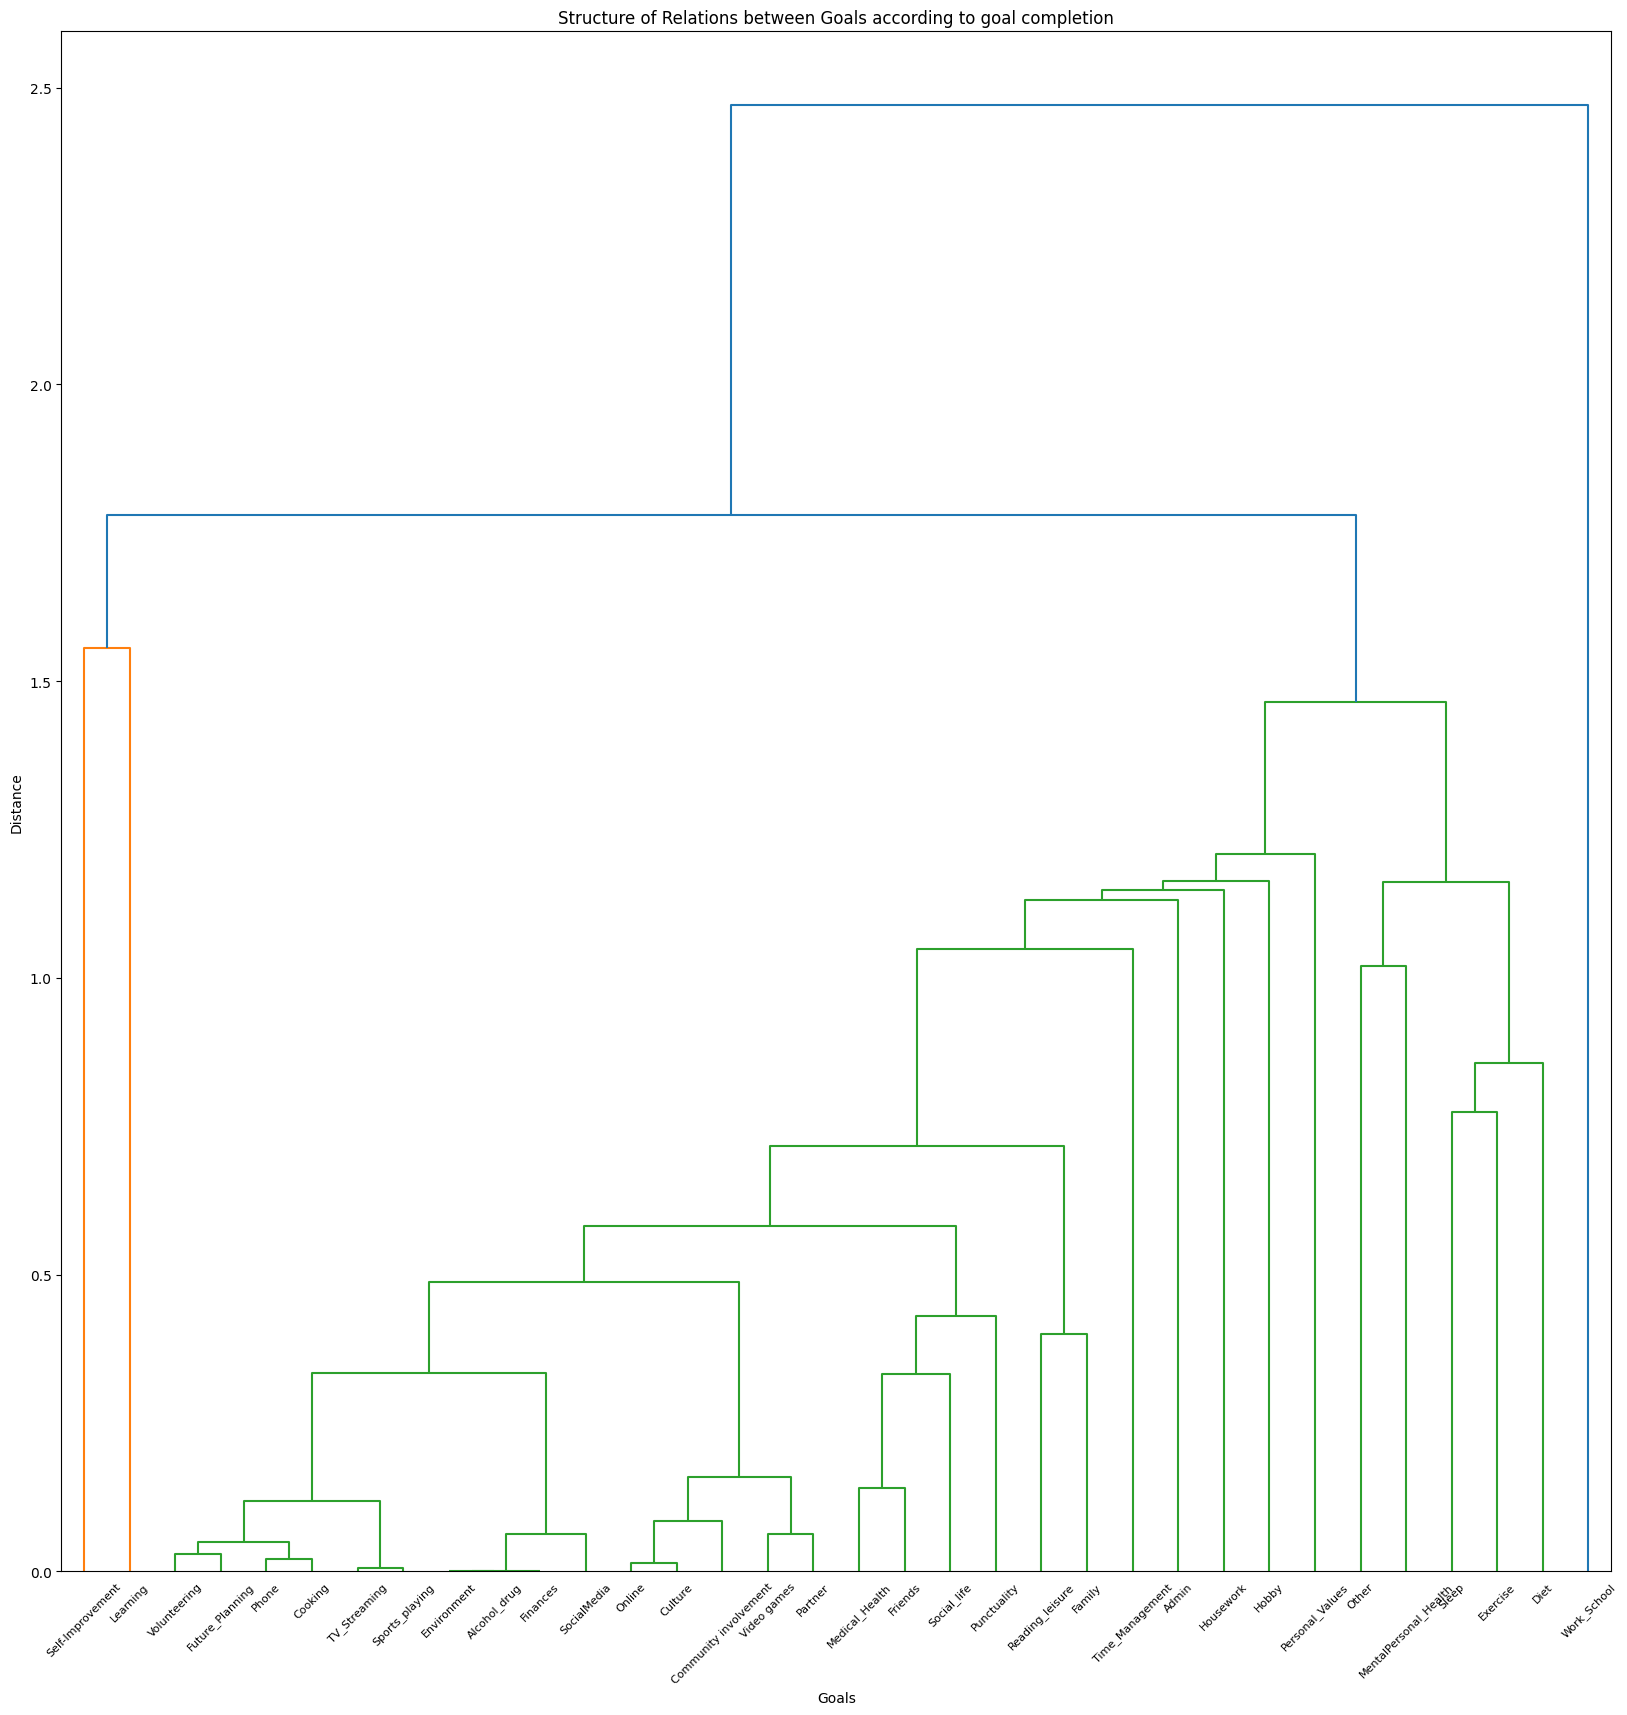

In [13]:
# Plot the dendrogram
plt.figure(figsize=(20, 20))
dendrogram(linked,
           labels=distance_matrix.index,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)

plt.title('Structure of Relations between Goals according to goal completion')
plt.xlabel('Goals')
plt.ylabel('Distance')
plt.show()

In [14]:
# num_super_categories = 25
# clusters = fcluster(linked, num_super_categories, criterion='maxclust')

# # Create a DataFrame to map categories to their super category
# categories = distance_matrix.index  # Assuming categories are the index of the distance matrix
# super_category_mapping = pd.DataFrame({'Category': categories, 'SuperCategory': clusters})

# # Group by the super category and get all category names in each super category
# super_category_groups = super_category_mapping.groupby('SuperCategory')['Category'].apply(list).to_dict()

# # Print the result
# for super_category, category_list in super_category_groups.items():
#     print(f"Super Category {super_category}: {category_list}")

In [15]:
conflict_matrix = distance_matrix.copy()
conflict_matrix = conflict_matrix - conflict_matrix.mean()


In [16]:
x_cols = ["DAILY_goal1_label", "DAILY_goal2_label"]
goal_self_reports["ob_conflict"] = goal_self_reports[x_cols].apply(
    lambda x : conflict_matrix[x[x_cols[0]]][x[x_cols[1]]], 
    axis=1
)

goal_self_reports["DAILY_goal2_interaction_eachOther"] = pd.to_numeric(goal_self_reports["DAILY_goal2_interaction_eachOther"], errors='coerce')
interaction_mean = goal_self_reports["DAILY_goal2_interaction_eachOther"].mean()

goal_self_reports["conflict"] = (goal_self_reports["DAILY_goal2_interaction_eachOther"]/10) + goal_self_reports["ob_conflict"]/2
goal_self_reports["conflict_category"] = goal_self_reports["conflict"] < 0

In [17]:
goal_self_reports["conflict_category"].value_counts()

conflict_category
True     5086
False    3769
Name: count, dtype: int64

In [18]:
goal_self_reports.head()

,index,ParticipantIdentifier,trial_date,DAILY_goal1_confidence,DAILY_goal1_consequences,DAILY_goal1_effort,DAILY_goal1_importance,DAILY_goal2_confidence,DAILY_goal2_consequences,DAILY_goal2_effort,...,DAILY_goal1_set,DAILY_goal2_set,DAILY_goal1_report,DAILY_goal2_report,DAILY_goal2_interaction_eachOther,DAILY_goal1_label,DAILY_goal2_label,ob_conflict,conflict,conflict_category
0,28,0501ba67-3406-4779-aff1-878a0e9f7885,2022-10-28,3,3,7,5,5,2,4,...,write ted script,exercise,0,100,-2.0,Work_School,Exercise,-0.036646,-0.218323,True
1,29,0501ba67-3406-4779-aff1-878a0e9f7885,2022-10-29,4,4,6,7,7,4,6,...,script,quizzical creation,0,62,-2.0,Work_School,Other,-0.039187,-0.219593,True
2,30,0501ba67-3406-4779-aff1-878a0e9f7885,2022-10-30,5,5,6,7,4,4,7,...,script,study psy and hisa,11,100,-2.0,Work_School,Work_School,-0.051931,-0.225965,True
3,31,0501ba67-3406-4779-aff1-878a0e9f7885,2022-10-31,4,4,6,7,3,2,7,...,study psy and hisa,preview d26 and review c19,76,0,-4.0,Work_School,Work_School,-0.051931,-0.425965,True
4,32,0501ba67-3406-4779-aff1-878a0e9f7885,2022-11-01,5,2,7,7,7,1,4,...,exercise,be happy,41,40,4.0,Exercise,MentalPersonal_Health,-0.305572,0.247214,False


In [19]:
run1_affect = get_evening_affect_run1(working_dir, "raw_data/run1_survey_results.csv")
run2_affect = get_evening_affect_run2(working_dir, "raw_data/run2_affect.csv")

affect_dataframe = pd.concat([run1_affect, run2_affect]).dropna()
affect_dataframe.head()

,ParticipantIdentifier,trial_date,affect_pos_amused,affect_pos_appreciated,affect_pos_excited,affect_pos_relaxedCalm,affect_pos_focused,affect_pos_happy,affect_pos_hopeful,affect_pos_motivated,...,affect_neg_frustrated,affect_neg_guilty,affect_neg_lazy,affect_neg_lonelyIsolated,affect_neg_nervousAnxious,affect_neg_sad,affect_neg_stressed,mean_pos_evening,mean_neg_evening,mean_affect_diff
0,0501ba67-3406-4779-aff1-878a0e9f7885,2022-09-30,1.0,1.0,4.0,5.0,5.0,4.0,1.0,1.0,...,3.0,4.0,4.0,2.0,3.0,2.0,1.0,2.750,2.833333,-0.083333
1,0501ba67-3406-4779-aff1-878a0e9f7885,2022-10-01,2.0,2.0,4.0,2.0,2.0,4.0,2.0,3.0,...,3.0,3.0,3.0,1.0,2.0,1.0,3.0,2.625,1.833333,0.791667
2,0501ba67-3406-4779-aff1-878a0e9f7885,2022-10-02,2.0,4.0,2.0,1.0,1.0,2.0,1.0,2.0,...,4.0,2.0,5.0,3.0,3.0,4.0,4.0,1.875,3.250000,-1.375000
3,0501ba67-3406-4779-aff1-878a0e9f7885,2022-10-03,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,...,5.0,2.0,4.0,3.0,4.0,3.0,4.0,1.500,2.833333,-1.333333
4,0501ba67-3406-4779-aff1-878a0e9f7885,2022-10-04,1.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,...,5.0,3.0,4.0,1.0,1.0,4.0,4.0,1.375,2.833333,-1.458333


In [20]:
affect_conflict = affect_dataframe.merge(
    goal_self_reports, how="inner", on=["ParticipantIdentifier", "trial_date"]
)
affect_conflict["DAILY_goal1_report"]  = pd.to_numeric(affect_conflict["DAILY_goal1_report"] , errors='coerce')
affect_conflict["DAILY_goal2_report"]  = pd.to_numeric(affect_conflict["DAILY_goal2_report"] , errors='coerce')

affect_conflict["completion"] = (affect_conflict["DAILY_goal1_report"] + affect_conflict["DAILY_goal2_report"])/2
affect_conflict.head()

,ParticipantIdentifier,trial_date,affect_pos_amused,affect_pos_appreciated,affect_pos_excited,affect_pos_relaxedCalm,affect_pos_focused,affect_pos_happy,affect_pos_hopeful,affect_pos_motivated,...,DAILY_goal2_set,DAILY_goal1_report,DAILY_goal2_report,DAILY_goal2_interaction_eachOther,DAILY_goal1_label,DAILY_goal2_label,ob_conflict,conflict,conflict_category,completion
0,0501ba67-3406-4779-aff1-878a0e9f7885,2022-10-28,1.0,1.0,1.0,3.0,4.0,3.0,1.0,2.0,...,exercise,0.0,100.0,-2.0,Work_School,Exercise,-0.036646,-0.218323,True,50.0
1,0501ba67-3406-4779-aff1-878a0e9f7885,2022-10-29,4.0,1.0,2.0,4.0,2.0,4.0,1.0,3.0,...,quizzical creation,0.0,62.0,-2.0,Work_School,Other,-0.039187,-0.219593,True,31.0
2,0501ba67-3406-4779-aff1-878a0e9f7885,2022-10-30,4.0,3.0,4.0,2.0,1.0,5.0,3.0,2.0,...,study psy and hisa,11.0,100.0,-2.0,Work_School,Work_School,-0.051931,-0.225965,True,55.5
3,0501ba67-3406-4779-aff1-878a0e9f7885,2022-10-31,3.0,3.0,4.0,1.0,3.0,5.0,2.0,4.0,...,preview d26 and review c19,76.0,0.0,-4.0,Work_School,Work_School,-0.051931,-0.425965,True,38.0
4,0501ba67-3406-4779-aff1-878a0e9f7885,2022-11-01,2.0,1.0,3.0,2.0,3.0,3.0,2.0,3.0,...,be happy,41.0,40.0,4.0,Exercise,MentalPersonal_Health,-0.305572,0.247214,False,40.5


In [21]:
cleanDF = affect_conflict[["conflict_category", "mean_pos_evening", "completion"]]
cleanDF

,conflict_category,mean_pos_evening,completion
0,True,2.000,50.0
1,True,2.625,31.0
2,True,3.000,55.5
3,True,3.125,38.0
4,False,2.375,40.5
...,...,...,...
8822,False,2.125,100.0
8823,True,4.500,100.0
8824,False,2.875,96.0
8825,False,2.500,49.5


In [22]:
def pearson_corr(group):
    return group['mean_pos_evening'].corr(group['completion'])

# Apply the Pearson correlation function to each group
corr_results = cleanDF.groupby('conflict_category').apply(pearson_corr)


/var/folders/57/9mrlx9kx6xsfb5tsnbtdb9d40000gn/T/ipykernel_60644/1109968851.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_results = cleanDF.groupby('conflict_category').apply(pearson_corr)


In [23]:
corr_results

conflict_category
False    0.205811
True     0.228738
dtype: float64

In [24]:
from datetime import datetime, timedelta

def get_weeks(df, pid):
    pid_df = df.loc[df.ParticipantIdentifier == pid]
    return sorted(list(set(pid_df.trial_date.to_list())))

def get_week_range(week_list: list, week_date: str):
    week_range = 7

    index = week_list.index(week_date)
    if index + 1 < len(week_list):
        next_week = week_list[index + 1]
        if datetime.strptime(week_date, "%Y-%m-%d") + timedelta(days=7) > datetime.strptime(next_week, "%Y-%m-%d"):
            delta = datetime.strptime(next_week, "%Y-%m-%d") - datetime.strptime(week_date, "%Y-%m-%d")
            week_range = delta.days

    return week_range

In [25]:
weekly_goal_embeddings_run1_path = os.path.join(working_dir, "raw_data/run1_weekly_goal_embeddings.csv")
weekly_goal_embeddings_run1_path = os.path.join(working_dir, "raw_data/run2_weekly_goal_embeddings.csv")

weeklyEmbeddingDF = pd.read_csv(weekly_goal_embeddings_run1_path).reset_index(drop=True)
weeklyEmbeddingDF.head(3)

,Unnamed: 0,ParticipantIdentifier,sr_WEEKLY_goal_set1,sr_WEEKLY_goal_set2,trial_date,weekLY_goal_set1_embedding,weekLY_goal_set2_embedding
0,0,d5f19109-8219-40e6-9fc1-6e02c3a06dcd,lose 2 kg to 54,follow up all course work,2023-02-05,"[-0.0020325728692114353, -0.006721132900565863...","[-0.016186557710170746, -0.010455827228724957,..."
1,1,d5f19109-8219-40e6-9fc1-6e02c3a06dcd,54kg for real,midterm for phlb60,2023-02-12,"[-0.0007336814887821674, 0.009759555570781231,...","[-0.02003639191389084, -0.00203127833083272, -..."
2,2,d5f19109-8219-40e6-9fc1-6e02c3a06dcd,53kg for real,study regularly,2023-02-19,"[-0.003935849294066429, 0.00927805621176958, -...","[-0.012323163449764252, -0.0009219467174261808..."


In [26]:
weekly_participant_list = list(set(weeklyEmbeddingDF.ParticipantIdentifier.to_list()))
# weekly_participant_list

In [27]:
## loop over participant list from weekly table
weekly_columns = [
    "WEEKLY_goal1_set", "WEEKLY_goal2_set", "WEEKLY_goal1_label", 
    "WEEKLY_goal2_label", "WEEKLY_goal_date"
]
affect_conflict[weekly_columns] = None

In [28]:
DF = affect_conflict
weekly_similarity_list = []
for participant in weekly_participant_list:
    ## GET PARTICIPANTS DAILY GOAL DF CLICE
    participant_daily_entry = DF.loc[DF['ParticipantIdentifier'] == participant]
    if len(participant_daily_entry) == 0:
        continue

    ## GET THIS PARTICIPANT's WEEKLY DF SLICE
    participant_weekly_entry = weeklyEmbeddingDF.loc[weeklyEmbeddingDF['ParticipantIdentifier'] == participant]

    ## GET THIS PARTICIPANT's WEEKLY GOAL SET DATES
    weekly_dates = get_weeks(participant_weekly_entry, participant)

    ## LOOP OVER THE WEEKLY GOAL SET DATES
    for week in weekly_dates:
        
        week_range = get_week_range(weekly_dates, week)

        ## GET THIS WEEK'S GOAL_SET_1 and GOAL_SET_2
        week_entry = participant_weekly_entry.loc[participant_weekly_entry['trial_date'] == week]
        weekly_goal_1_set = week_entry.to_dict('records')[0]['sr_WEEKLY_goal_set1']
        weekly_goal_2_set = week_entry.to_dict('records')[0]['sr_WEEKLY_goal_set2']
        # weekly_goal_1_label
        # weekly_goal_2_label
        weekly_goal_date = week_entry.to_dict('records')[0]['trial_date']

        # ## GET WEELY GOAL EMBEDDINGS
        # weekly_goal_1_embedding = week_entry.to_dict('records')[0]['weekLY_goal_set1_embedding']
        # weekly_goal_2_embedding = week_entry.to_dict('records')[0]['weekLY_goal_set2_embedding']
            
        ## LOOP OVER DAYS OF THE WEEK
        for i in range(week_range):
            trial_date = (datetime.strptime(week, "%Y-%m-%d") + timedelta(days=i)).strftime('%Y-%m-%d')
                
            daily_goal_index = participant_daily_entry.index[participant_daily_entry['trial_date'] == trial_date].tolist()
            if len(daily_goal_index) == 0:
                continue  # Skip if no entry for this day

            daily_goal_index = daily_goal_index[0]

            # UPDATE THE DAILY ENTRY DIRECTLY IN THE ORIGINAL DATAFRAME
            DF.loc[daily_goal_index, "WEEKLY_goal1_set"] = weekly_goal_1_set
            DF.loc[daily_goal_index, "WEEKLY_goal2_set"] = weekly_goal_2_set
            DF.loc[daily_goal_index, "WEEKLY_goal_date"] = weekly_goal_date

            # Optionally add the modified entry to a list for similarity purposes
            weekly_similarity_list.append(DF.loc[daily_goal_index])

In [29]:
DF

,ParticipantIdentifier,trial_date,affect_pos_amused,affect_pos_appreciated,affect_pos_excited,affect_pos_relaxedCalm,affect_pos_focused,affect_pos_happy,affect_pos_hopeful,affect_pos_motivated,...,DAILY_goal2_label,ob_conflict,conflict,conflict_category,completion,WEEKLY_goal1_set,WEEKLY_goal2_set,WEEKLY_goal1_label,WEEKLY_goal2_label,WEEKLY_goal_date
0,0501ba67-3406-4779-aff1-878a0e9f7885,2022-10-28,1.0,1.0,1.0,3.0,4.0,3.0,1.0,2.0,...,Exercise,-0.036646,-0.218323,True,50.0,None,None,None,None,None
1,0501ba67-3406-4779-aff1-878a0e9f7885,2022-10-29,4.0,1.0,2.0,4.0,2.0,4.0,1.0,3.0,...,Other,-0.039187,-0.219593,True,31.0,None,None,None,None,None
2,0501ba67-3406-4779-aff1-878a0e9f7885,2022-10-30,4.0,3.0,4.0,2.0,1.0,5.0,3.0,2.0,...,Work_School,-0.051931,-0.225965,True,55.5,None,None,None,None,None
3,0501ba67-3406-4779-aff1-878a0e9f7885,2022-10-31,3.0,3.0,4.0,1.0,3.0,5.0,2.0,4.0,...,Work_School,-0.051931,-0.425965,True,38.0,None,None,None,None,None
4,0501ba67-3406-4779-aff1-878a0e9f7885,2022-11-01,2.0,1.0,3.0,2.0,3.0,3.0,2.0,3.0,...,MentalPersonal_Health,-0.305572,0.247214,False,40.5,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8822,b62d508b-4768-4dc4-9bf3-bc8f59bf2388,2023-04-18,2.0,1.0,2.0,4.0,2.0,2.0,2.0,2.0,...,Video games,-0.236706,0.081647,False,100.0,Take a dance class,Finish exam,None,None,2023-04-16
8823,b62d508b-4768-4dc4-9bf3-bc8f59bf2388,2023-04-20,5.0,4.0,4.0,5.0,4.0,5.0,4.0,5.0,...,Other,-0.725494,-0.362747,True,100.0,Take a dance class,Finish exam,None,None,2023-04-16
8824,b62d508b-4768-4dc4-9bf3-bc8f59bf2388,2023-04-21,3.0,1.0,3.0,3.0,4.0,3.0,3.0,3.0,...,Admin,0.125405,0.162703,False,96.0,Take a dance class,Finish exam,None,None,2023-04-16
8825,b62d508b-4768-4dc4-9bf3-bc8f59bf2388,2023-04-22,3.0,3.0,3.0,4.0,2.0,3.0,1.0,1.0,...,Exercise,-0.036646,0.181677,False,49.5,Take a dance class,Finish exam,None,None,2023-04-16
